In [2]:
import os
import sys

# Adiciona o caminho da pasta `main` ao sys.path
sys.path.append(os.path.abspath("../../"))


In [3]:

# Importar a classe Visualization
from classes.visualization.visualization import Visualization
import pandas as pd

# Importar os dados
stock_data = pd.read_csv('../../datasets/b3_dados/processed/acoes_concat.csv')
scaled_financial_assets = pd.read_csv('../../datasets/b3_dados/processed/selected_stocks_normalized.csv')

In [4]:
stock_data

,Date,ITUB4,BBAS3,CYRE3,TEND3,DIRR3,ELET3,EQTL3,CMIG4,PETR3,VALE3,BRAP3
0,2010-01-04,10.562274,5.562300,14.371702,5.135384,5.177327,20.123955,2.727207,1.917287,11.676325,23.756481,3.748754
1,2010-01-05,10.630730,5.506486,14.235113,5.089202,5.154717,19.958874,2.748718,1.946624,11.606239,23.977951,3.767592
2,2010-01-06,10.538581,5.513929,14.252928,5.089202,5.109501,19.703260,2.719525,1.909956,11.721180,24.485470,3.805269
3,2010-01-07,10.430645,5.515787,13.979749,5.061493,5.154717,20.161232,2.688796,1.891619,11.651093,24.586971,3.852364
4,2010-01-08,10.272685,5.547416,13.955992,4.950658,5.163762,20.502045,2.728743,1.889784,11.564186,24.826887,3.899458
...,...,...,...,...,...,...,...,...,...,...,...,...
3158,2022-09-23,24.634073,17.513254,15.503020,7.171067,12.927425,44.050091,26.192175,6.683025,19.150974,58.827377,16.100027
3159,2022-09-26,24.103085,16.782280,14.975771,6.987441,12.427061,42.688801,25.939671,6.806203,18.906494,58.956070,16.168182
3160,2022-09-27,23.963816,16.571592,14.864769,6.832809,12.304021,41.461727,25.395823,6.219857,19.133511,58.080986,16.024296
3161,2022-09-28,23.955107,16.575890,16.076519,6.910125,12.681343,40.876949,25.347263,6.133631,18.999628,58.630054,16.062159


In [5]:
viz = Visualization(stock_data)
viz_scaled = Visualization(scaled_financial_assets)

1. **Gráficos de Barras**\
\
Objetivo: Comparar valores agregados (como média, máximo ou mínimo) entre ações.

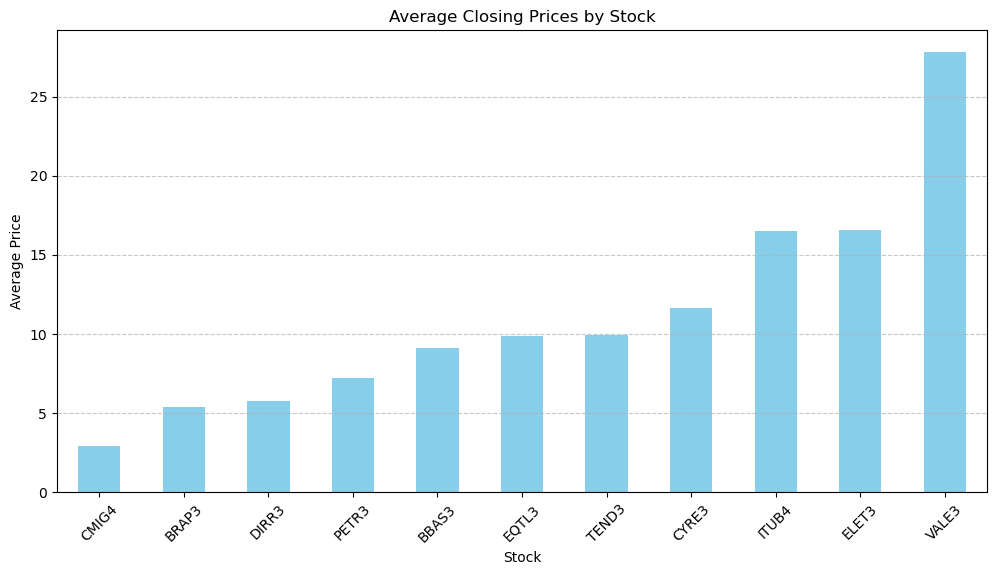

In [6]:
viz.plot_average_prices()


2. **Gráficos de Linhas**\
\
Objetivo: Comparar preços ao longo do tempo para várias ações.

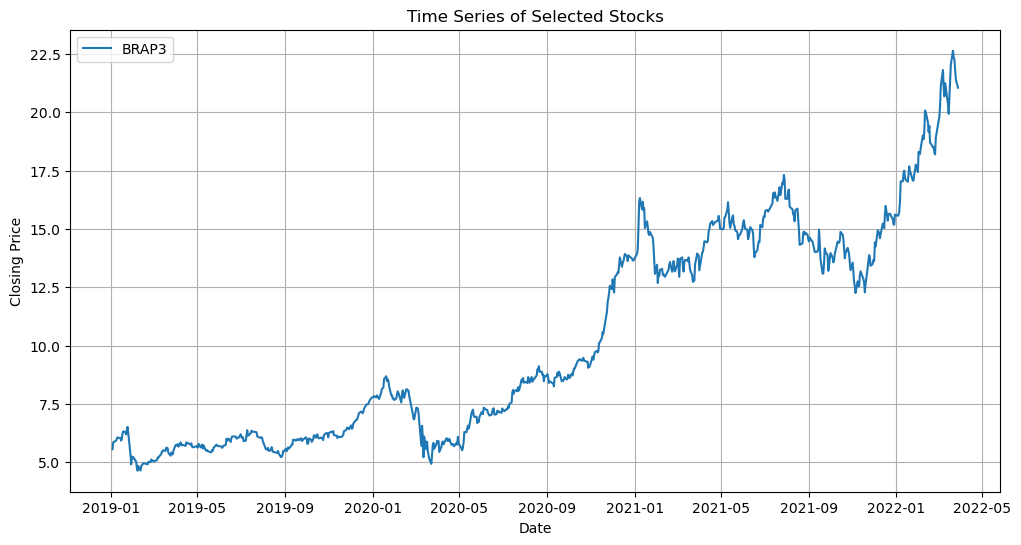

In [15]:
viz.plot_time_series(stocks=['BRAP3'], start_date='2019-01-03', end_date='2022-03-28')

3. **Boxplots**\
\
Objetivo: Comparar a dispersão e os outliers dos preços de diferentes ações.

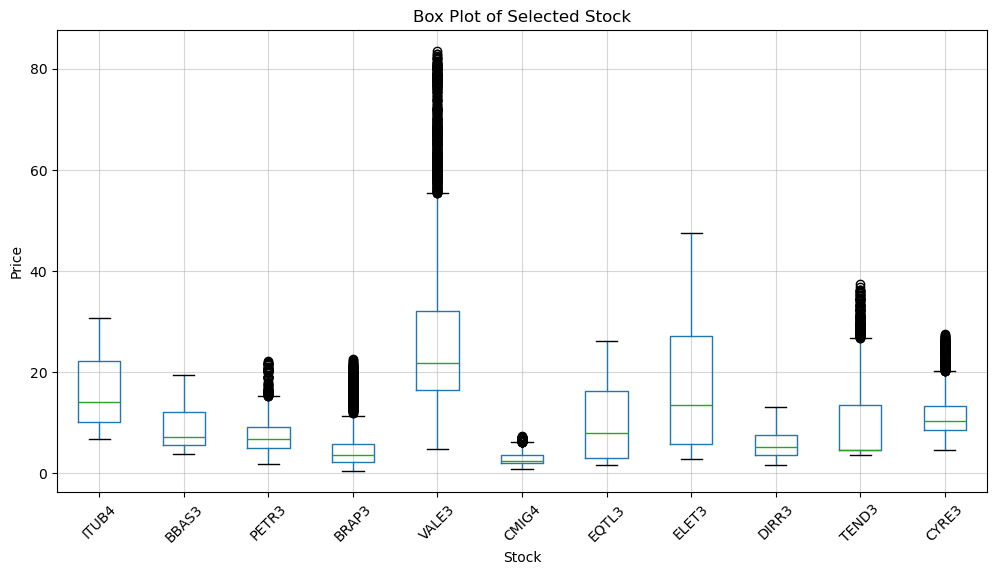

In [8]:
viz.plot_boxplot(stocks=['ITUB4', 'BBAS3', 'PETR3','BRAP3','VALE3','CMIG4','EQTL3','ELET3','DIRR3','TEND3','CYRE3'], title="Box Plot of Selected Stock")

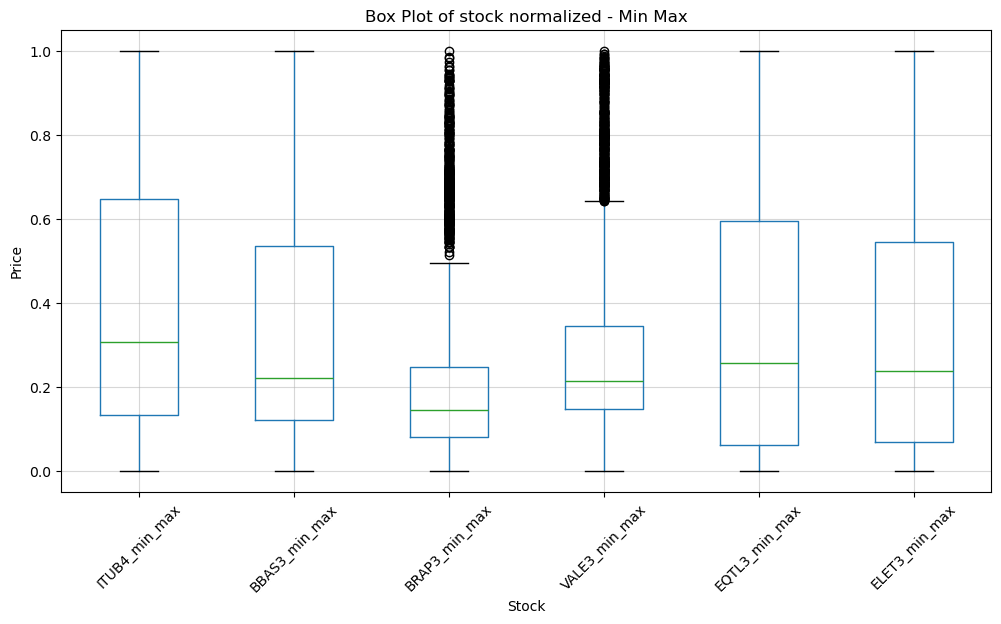

In [9]:
viz_scaled.plot_boxplot(stocks =['ITUB4_min_max', 'BBAS3_min_max','BRAP3_min_max','VALE3_min_max','EQTL3_min_max','ELET3_min_max'], title="Box Plot of stock normalized - Min Max")

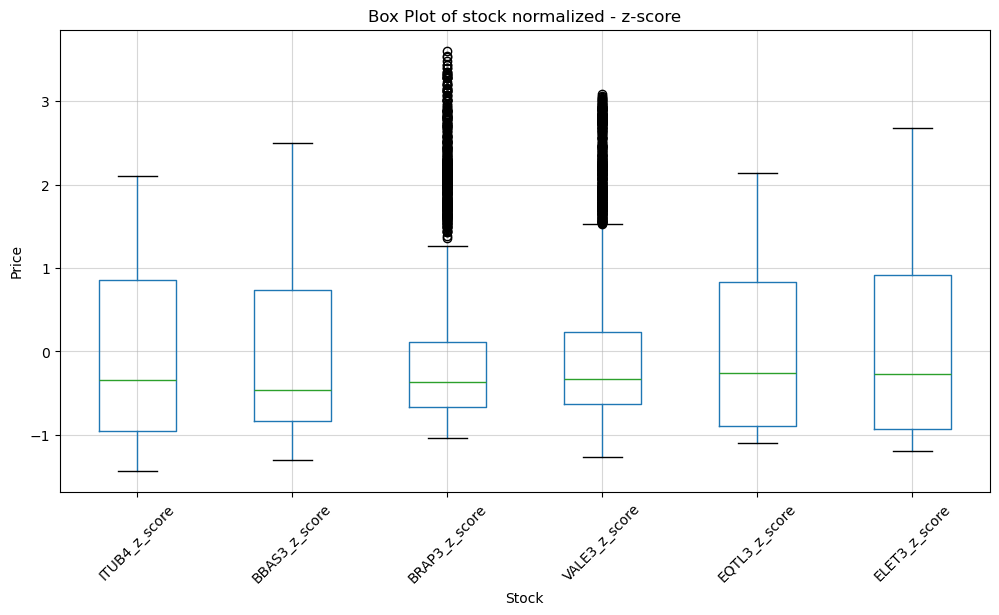

In [10]:
viz_scaled.plot_boxplot(stocks =['ITUB4_z_score', 'BBAS3_z_score','BRAP3_z_score','VALE3_z_score','EQTL3_z_score','ELET3_z_score'], title="Box Plot of stock normalized - z-score")

4. **Heatmaps de Correlação**\
\
Objetivo: Comparar a correlação entre os preços das ações.

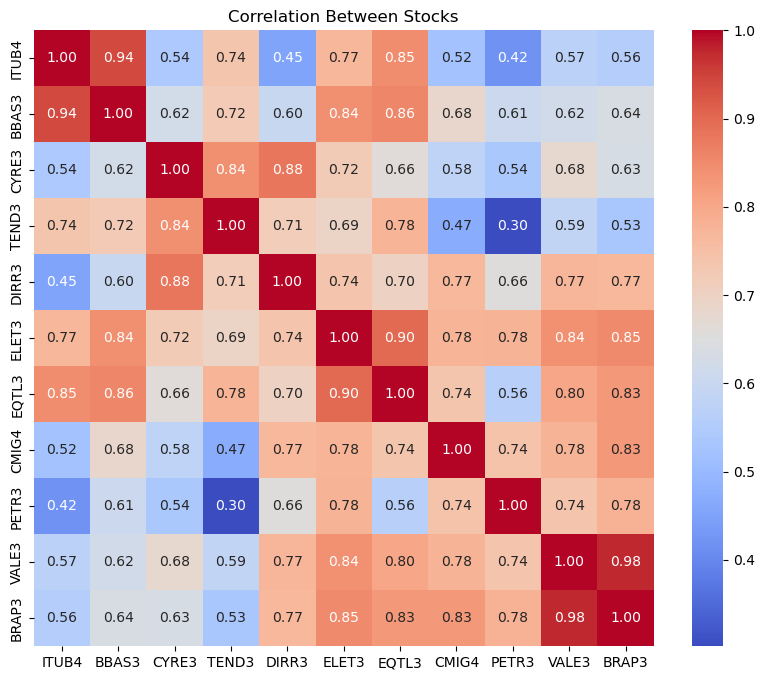

In [11]:
viz.plot_correlation_matrix()

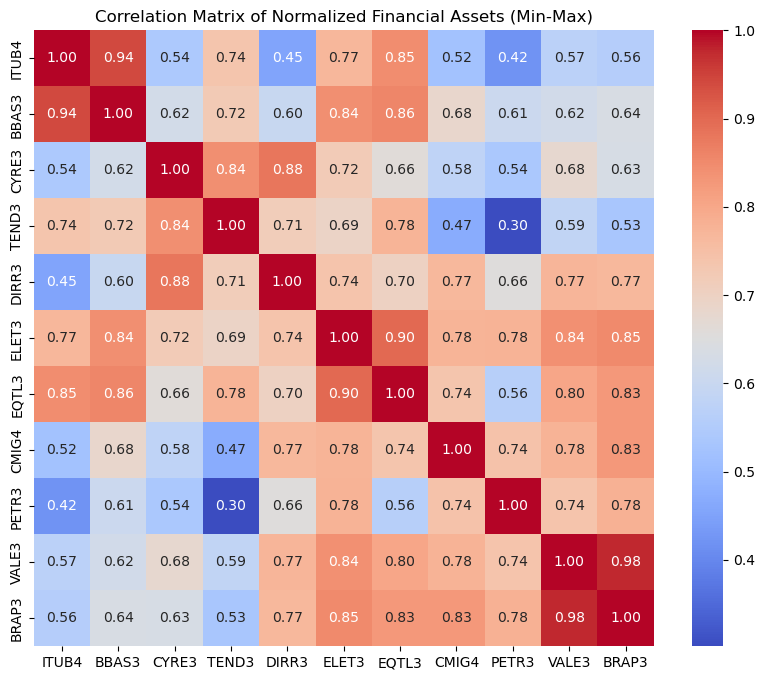

In [12]:
import seaborn as sns
# Seleciona apenas as colunas normalizadas com min-max
min_max_columns = [col for col in scaled_financial_assets.columns if 'min_max' in col]

# Renomeia as colunas para remover a extensão 'min_max'
renamed_columns = {col: col.replace('_min_max', '') for col in min_max_columns}
assets_normalized_renamed = scaled_financial_assets[min_max_columns].rename(columns=renamed_columns)


# Plota a matriz de correlação
viz.plot_correlation_matrix(assets_normalized_renamed, title='Correlation Matrix of Normalized Financial Assets (Min-Max)')


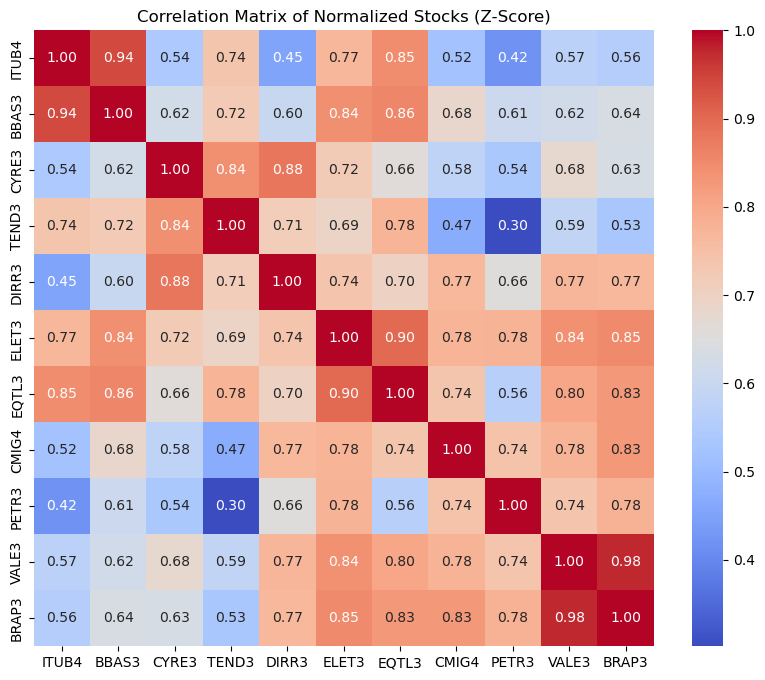

In [13]:
# Seleciona apenas as colunas normalizadas com z-score
z_score_columns = [col for col in scaled_financial_assets.columns if 'z_score' in col]

# Renomeia as colunas para remover a extensão 'z_score'
renamed_z_score_columns = {col: col.replace('_z_score', '') for col in z_score_columns}
assets_normalized_z_score_renamed = scaled_financial_assets[z_score_columns].rename(columns=renamed_z_score_columns)

# Plota a matriz de correlação
viz.plot_correlation_matrix(assets_normalized_z_score_renamed, title='Correlation Matrix of Normalized Stocks (Z-Score)')

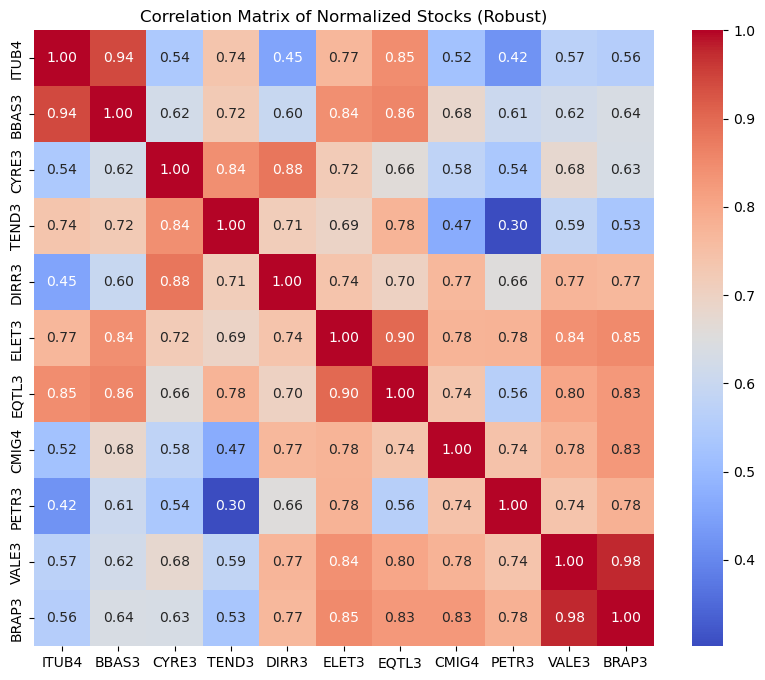

In [14]:
# Seleciona apenas as colunas normalizadas com robust
robust_columns = [col for col in scaled_financial_assets.columns if 'robust' in col]

# Renomeia as colunas para remover a extensão 'robust'
renamed_robust_columns = {col: col.replace('_robust', '') for col in robust_columns}
assets_normalized_robust_renamed = scaled_financial_assets[robust_columns].rename(columns=renamed_robust_columns)

# Plota a matriz de correlação
viz.plot_correlation_matrix(assets_normalized_robust_renamed, title='Correlation Matrix of Normalized Stocks (Robust)')